# WeatherPy Analysis

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Today's date
today = date.today()

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'Weather_Output/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'Total cities collected: {len(cities)}.')

The number of cities collected was: 628.


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Identify base url for API call and units we want data to be displayed in
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Build partial query URL
query_url = f'{url}appid={weather_api_key}&units={units}&q='

In [4]:
# Create blank DataFrame with desired columns headers and cities identified
weather_df = pd.DataFrame({'City': cities, 'Lat': '', 'Lng': '', 'Max Temp': '', 'Humidity': '', 
                           'Cloudiness': '', 'Wind Speed': '', 'Country': '', 'Date': ''})
weather_df

record_num = 1
set_num = 1

for index, row in weather_df.iterrows():
    
    city_query = query_url + row['City']
    response = requests.get(city_query).json()

    try:
        print(f'Processing Record {record_num} of Set {set_num} | {response["name"]}')

        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        weather_df.loc[index, 'Country'] = response['sys']['country']
        weather_df.loc[index, 'Date'] = response['dt']

    except (KeyError, IndexError):
        print(f'City not found...Skipping')

    record_num += 1
    
    if record_num == 101:
        set_num += 1
        record_num = 1

Processing Record 1 of Set 1 | Narsaq
Processing Record 2 of Set 1 | Pontianak
Processing Record 3 of Set 1 | Vila Franca do Campo
Processing Record 4 of Set 1 | Puerto Ayora
Processing Record 5 of Set 1 | Xining
Processing Record 6 of Set 1 | Mar del Plata
Processing Record 7 of Set 1 | Tsimmerbude
Processing Record 8 of Set 1 | Arraial do Cabo
Processing Record 9 of Set 1 | Changji
Processing Record 10 of Set 1 | Cam Ranh
Processing Record 11 of Set 1 | Bluff
Processing Record 12 of Set 1 | Dingle
Processing Record 13 of Set 1 | Yangi Marg`ilon
Processing Record 14 of Set 1 | Half Moon Bay
Processing Record 15 of Set 1 | Ushuaia
Processing Record 16 of Set 1 | Nemuro
City not found...Skipping
Processing Record 18 of Set 1 | Khatanga
City not found...Skipping
Processing Record 20 of Set 1 | Punta Arenas
Processing Record 21 of Set 1 | Albany
Processing Record 22 of Set 1 | Rikitea
Processing Record 23 of Set 1 | Westport
Processing Record 24 of Set 1 | Mahébourg
Processing Record 25 o

Processing Record 6 of Set 3 | Alappuzha
Processing Record 7 of Set 3 | Kruisfontein
Processing Record 8 of Set 3 | Tiksi
Processing Record 9 of Set 3 | Ribeira Brava
Processing Record 10 of Set 3 | Kungurtug
City not found...Skipping
Processing Record 12 of Set 3 | Mandalgovi
Processing Record 13 of Set 3 | Portland
Processing Record 14 of Set 3 | Kumul
Processing Record 15 of Set 3 | Saint Paul Harbor
Processing Record 16 of Set 3 | Soc Trang
Processing Record 17 of Set 3 | Anzio
City not found...Skipping
Processing Record 19 of Set 3 | Katsuura
Processing Record 20 of Set 3 | Atbasar
City not found...Skipping
Processing Record 22 of Set 3 | Soe
Processing Record 23 of Set 3 | Esfarāyen
Processing Record 24 of Set 3 | Amboasary
Processing Record 25 of Set 3 | The Valley
Processing Record 26 of Set 3 | Seoul
Processing Record 27 of Set 3 | Swedru
Processing Record 28 of Set 3 | Zonguldak
Processing Record 29 of Set 3 | Ribeira Grande
Processing Record 30 of Set 3 | Abu Dhabi
Processin

Processing Record 13 of Set 5 | Blagoyevo
Processing Record 14 of Set 5 | Naryan-Mar
Processing Record 15 of Set 5 | Ratlām
Processing Record 16 of Set 5 | Ostrovnoy
Processing Record 17 of Set 5 | Diamantina
Processing Record 18 of Set 5 | Beloostrov
Processing Record 19 of Set 5 | Adelaide
Processing Record 20 of Set 5 | Najrān
Processing Record 21 of Set 5 | Kitimat
Processing Record 22 of Set 5 | Korla
Processing Record 23 of Set 5 | Tongzi
Processing Record 24 of Set 5 | Newport
Processing Record 25 of Set 5 | Innisfail
Processing Record 26 of Set 5 | Tamiahua
Processing Record 27 of Set 5 | Sirte
City not found...Skipping
City not found...Skipping
Processing Record 30 of Set 5 | Qeshm
Processing Record 31 of Set 5 | Windhoek
Processing Record 32 of Set 5 | Sri Aman
Processing Record 33 of Set 5 | Port Hedland
Processing Record 34 of Set 5 | Tommot
Processing Record 35 of Set 5 | Cayenne
Processing Record 36 of Set 5 | Port Lincoln
Processing Record 37 of Set 5 | Karaton
Processin

Processing Record 21 of Set 7 | Plaridel
Processing Record 22 of Set 7 | Ashcroft
Processing Record 23 of Set 7 | Inhambane
Processing Record 24 of Set 7 | High Level
Processing Record 25 of Set 7 | Luebo
Processing Record 26 of Set 7 | Sørland
Processing Record 27 of Set 7 | Alofi
Processing Record 28 of Set 7 | Strezhevoy


In [5]:
# Print the weather DataFrame
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,narsaq,60.9167,-46.05,46.62,96,100,3.04,GL,1650741757
1,pontianak,-0.0333,109.333,76.98,94,100,2.3,ID,1650741758
2,vila franca do campo,37.7167,-25.4333,57.61,83,100,10.22,PT,1650741695
3,puerto ayora,-0.7393,-90.3518,78.76,81,66,10.63,EC,1650741278
4,xining,36.6167,101.767,42.51,86,100,0.43,CN,1650741759
...,...,...,...,...,...,...,...,...,...
623,high level,58.5169,-117.136,46.51,49,0,6.91,CA,1650741945
624,luebo,-5.35,21.4167,72.54,97,100,1.41,CD,1650741946
625,sorland,67.667,12.6934,41.49,83,86,8.37,NO,1650741790
626,alofi,-19.0595,-169.919,75.09,100,99,2.3,NU,1650741946


## Clean the DataFrame and write to a CSV

In [6]:
# Replace the blank cells with 'NaN' values and drop all rows containing NaN values
weather_df.dtypes

columns = []

for column in weather_df:
    columns.append(column)

for column in columns:
    weather_df[column].replace('', np.nan, inplace = True)

weather_df = weather_df.dropna(how = 'any')
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,narsaq,60.9167,-46.0500,46.62,96.0,100.0,3.04,GL,1.650742e+09
1,pontianak,-0.0333,109.3333,76.98,94.0,100.0,2.30,ID,1.650742e+09
2,vila franca do campo,37.7167,-25.4333,57.61,83.0,100.0,10.22,PT,1.650742e+09
3,puerto ayora,-0.7393,-90.3518,78.76,81.0,66.0,10.63,EC,1.650741e+09
4,xining,36.6167,101.7667,42.51,86.0,100.0,0.43,CN,1.650742e+09
...,...,...,...,...,...,...,...,...,...
623,high level,58.5169,-117.1360,46.51,49.0,0.0,6.91,CA,1.650742e+09
624,luebo,-5.3500,21.4167,72.54,97.0,100.0,1.41,CD,1.650742e+09
625,sorland,67.6670,12.6934,41.49,83.0,86.0,8.37,NO,1.650742e+09
626,alofi,-19.0595,-169.9187,75.09,100.0,99.0,2.30,NU,1.650742e+09


In [7]:
# Inspect the Data to see if there are any cities where the humidity is > 100%
max_humidity = weather_df['Humidity'].max()
max_humidity
print(f'Of the cities collected, the max humidity is: {max_humidity}.')

Of the cities collected, the max humidity is: 100.0.


In [8]:
# Export the cleaned DataFrame to a csv file
weather_df.to_csv(output_data_file, index = False, header = True)

In [9]:
# Convert Date column from Unix format to a readable date format
weather_df['Date'] = pd.to_datetime(weather_df['Date'], unit = 's').dt.date
weather_df.head()

/Users/graceolson/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,narsaq,60.9167,-46.0500,46.62,96.0,100.0,3.04,GL,2022-04-23
1,pontianak,-0.0333,109.3333,76.98,94.0,100.0,2.30,ID,2022-04-23
2,vila franca do campo,37.7167,-25.4333,57.61,83.0,100.0,10.22,PT,2022-04-23
3,puerto ayora,-0.7393,-90.3518,78.76,81.0,66.0,10.63,EC,2022-04-23
4,xining,36.6167,101.7667,42.51,86.0,100.0,0.43,CN,2022-04-23


## Plot the Data

### Latitude vs. Temperature (F)

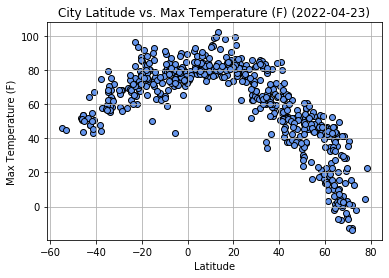

In [11]:
# Create a scatter plot of City Latitude vs. Max_Temp and save the plot as a .png to the Weather_Output directory
x_axis1 = weather_df['Lat']
y_axis1 = weather_df['Max Temp']

plt.scatter(x_axis1, y_axis1, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature (F) ({today})', fontsize = 12)
plt.grid(True)

plt.savefig('Weather_Output/City Latitude vs. Max Temperature.png')

plt.show()

### Observations:

* This graph plots city latitude against max temperature. 
* The plot shows cities closer to the equator (latitude 0 degrees) have higher max temperatures than those cities further from the equator. 
* In other words, the plot confirms our initial hypothesis that the weather gets hotter as we move closer to the equator.

### Latitude vs. Humidity (%)

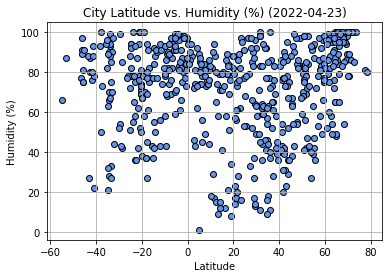

In [14]:
# Create a scatter plot of City Latitude vs. Humidity and save the plot as a .png to the Weather_Output directory
x_axis2 = weather_df['Lat']
y_axis2 = weather_df['Humidity']

plt.scatter(x_axis2, y_axis2, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity (%) ({today})', fontsize = 12)
plt.grid(True)

plt.savefig('Weather_Output/City Latitude vs. Humidity.png')

plt.show()

### Observations:

* This graph plots city latitude against humidity levels. 
* There does not appear to be a strong relationship between city latitude and humidity levels. However, there does appear to be some clustering in the middle-left and upper-right corner of the plot.

### Latitude vs. Cloudiness (%)

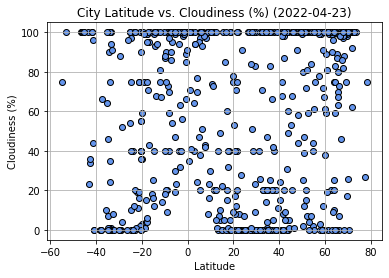

In [15]:
# Create a scatter plot of City Latitude vs. Cloudiness and save the plot as a .png to the Weather_Output directory
x_axis3 = weather_df['Lat']
y_axis3 = weather_df['Cloudiness']

plt.scatter(x_axis3, y_axis3, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness (%) ({today})', fontsize = 12)
plt.grid(True)

plt.savefig('Weather_Output/City Latitude vs. Cloudiness.png')

plt.show()

### Observations:

* This graph plots city latitude against cloudiness %.
* Based on how scattered the plot is, there does not appear to be a strong relationship between city latitude and cloudiness levels.

### Latitude vs. Wind Speed (mph)

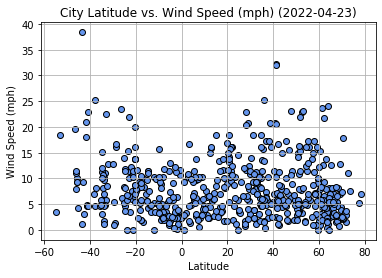

In [16]:
# Create a scatter plot of City Latitude vs. Cloudiness and save the plot as a .png to the Weather_Output directory
x_axis4 = weather_df['Lat']
y_axis4 = weather_df['Wind Speed']

plt.scatter(x_axis4, y_axis4, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed (mph) ({today})', fontsize = 12)
plt.grid(True)

plt.savefig('Weather_Output/City Latitude vs. Wind Speed.png')

plt.show()

### Observations

* This graph plots city latitude against wind speed. 
* Based on how scattered the plot is, there does not appear to be a strong relationship between city latitude and wind speed. However, the plot does show some clustering at the bottom, indicating wind speed rarely goes above 25 mph in the cities selected.

## Linear Regression

In [17]:
# Create a Northern Hemisphere DataFrame
northern_hemp = weather_df.loc[weather_df['Lat'] >= 0, :]
northern_hemp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,narsaq,60.9167,-46.0500,46.62,96.0,100.0,3.04,GL,2022-04-23
2,vila franca do campo,37.7167,-25.4333,57.61,83.0,100.0,10.22,PT,2022-04-23
4,xining,36.6167,101.7667,42.51,86.0,100.0,0.43,CN,2022-04-23
6,svetlyy,54.6750,20.1347,46.45,93.0,44.0,4.90,RU,2022-04-23
8,changji,44.0167,87.3167,65.19,29.0,0.0,4.47,CN,2022-04-23
...,...,...,...,...,...,...,...,...,...
620,plaridel,14.8872,120.8572,82.38,79.0,22.0,3.71,PH,2022-04-23
621,ashcroft,50.7165,-121.2859,60.48,41.0,12.0,5.10,CA,2022-04-23
623,high level,58.5169,-117.1360,46.51,49.0,0.0,6.91,CA,2022-04-23
625,sorland,67.6670,12.6934,41.49,83.0,86.0,8.37,NO,2022-04-23


In [18]:
# Create a Southern Hemisphere DataFrame
southern_hemp = weather_df.loc[weather_df['Lat'] < 0, :]
southern_hemp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,pontianak,-0.0333,109.3333,76.98,94.0,100.0,2.30,ID,2022-04-23
3,puerto ayora,-0.7393,-90.3518,78.76,81.0,66.0,10.63,EC,2022-04-23
5,mar del plata,-38.0023,-57.5575,74.95,50.0,0.0,25.32,AR,2022-04-23
7,arraial do cabo,-22.9661,-42.0278,96.76,58.0,0.0,11.50,BR,2022-04-23
10,bluff,-46.6000,168.3333,51.80,77.0,100.0,19.66,NZ,2022-04-23
...,...,...,...,...,...,...,...,...,...
616,te anau,-45.4167,167.7167,50.31,91.0,100.0,4.23,NZ,2022-04-23
619,namatanai,-3.6667,152.4333,79.16,81.0,94.0,6.38,PG,2022-04-23
622,inhambane,-23.8650,35.3833,71.58,100.0,0.0,0.00,MZ,2022-04-23
624,luebo,-5.3500,21.4167,72.54,97.0,100.0,1.41,CD,2022-04-23


In [26]:
# Define a function for the line regressions to perform on the northern_hemp and southern_hemp dataframes
def linear_regression(x_axis_lreg, y_axis_lreg, x_label, y_label, chart_title, line_eq_x, line_eq_y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_lreg, y_axis_lreg)
    regress_values = x_axis_lreg * slope + intercept
    line_eq = (f'y = {(round(slope,2))}x  + {(round(intercept,2))}')

    plt.scatter(x_axis_lreg, y_axis_lreg, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(chart_title)
    plt.plot(x_axis_lreg, regress_values, 'r')
    plt.annotate(line_eq, (line_eq_x, line_eq_y), fontsize = 12, color = 'red', size = 14)
    plt.show
    
    print(f'The r-square value is: {round(rvalue**2,5)}.')

### Northern Hemisphere - Latitude vs. Temperature (F)

The r-square value is: 0.76139.


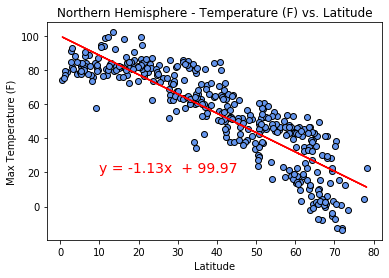

In [27]:
# Using the linear_regression function defined above, plot the linear regression between NH Temperature and Latitude
linear_regression(northern_hemp['Lat'], northern_hemp['Max Temp'], 'Latitude', 'Max Temperature (F)', 
                  'Northern Hemisphere - Temperature (F) vs. Latitude', 10, 20)

### Southern Hemisphere -  Latitude vs. Temperature (F)

The r-square value is: 0.46698.


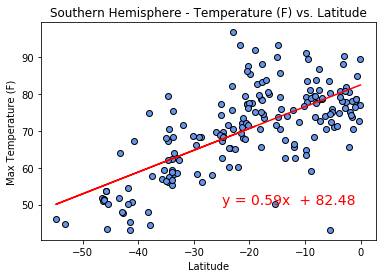

In [28]:
# Using the linear_regression function defined above, plot the linear regression between SH Temperature and Latitude
linear_regression(southern_hemp['Lat'], southern_hemp['Max Temp'], 'Latitude', 'Max Temperature (F)', 
                  'Southern Hemisphere - Temperature (F) vs. Latitude', -25, 50)

### Observations:

* Based on the r-square values:
    * The max temperature of cities in the northern hempishere appear to have a somewhat strong negative correlation with latitude.
    * The max temperature of cities in the southern hempishere appear to have a moderately positive correlation with latitude.
* Overall Conclusion: cities closer to the equator are hotter.

### Northern Hemisphere -  Latitude vs. Humidity (%)

The r-square value is: 0.09912.


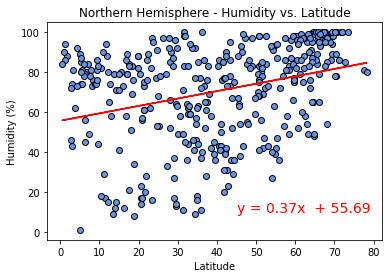

In [38]:
# Using the linear_regression function defined above, plot the linear regression between NH Humidity and Latitude
linear_regression(northern_hemp['Lat'], northern_hemp['Humidity'], 'Latitude', 'Humidity (%)', 
                  'Northern Hemisphere - Humidity vs. Latitude', 45, 10)

### Southern Hemisphere - Latitude vs. Humidity (%)

The r-square value is: 0.02506.


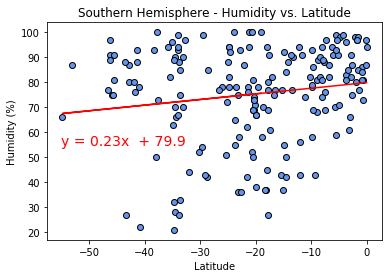

In [37]:
# Using the linear_regression function defined above, plot the linear regression between SH Humidity and Latitude
linear_regression(southern_hemp['Lat'], southern_hemp['Humidity'], 'Latitude', 'Humidity (%)', 
                  'Southern Hemisphere - Humidity vs. Latitude', -55, 55)

### Observations:

* Based on the r-square values:
    * The humidity % of cities in the northern hempishere appear to have a weak positive correlation with latitude.
    * The humidity % of cities in the southern hempishere appear to have a very weak positive correlation with latitude.
* Overall Conclusion: cities closer to the equator are not more or less humid.

### Northern Hemisphere - Latitude vs. Cloudiness (%)

The r-square value is: 0.04859.


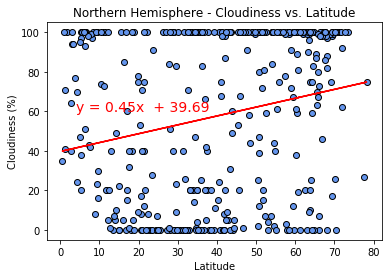

In [36]:
# Using the linear_regression function defined above, plot the linear regression between NH Cloudiness and Latitude
linear_regression(northern_hemp['Lat'], northern_hemp['Cloudiness'], 'Latitude', 'Cloudiness (%)', 
                  'Northern Hemisphere - Cloudiness vs. Latitude', 4, 60)

### Southern Hemisphere - Latitude vs. Cloudiness (%)

The r-square value is: 0.04529.


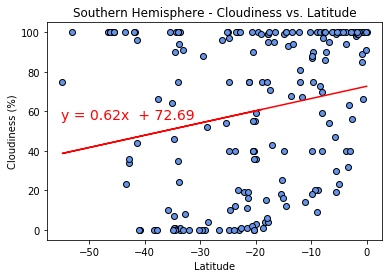

In [35]:
# Using the linear_regression function defined above, plot the linear regression between SH Cloudiness and Latitude
linear_regression(southern_hemp['Lat'], southern_hemp['Cloudiness'], 'Latitude', 'Cloudiness (%)', 
                  'Southern Hemisphere - Cloudiness vs. Latitude', -55, 56)

### Observations:

* Based on the r-square values:
    * The cloudiness % of cities in the northern hempishere appear to have a very weak positive correlation with latitude.
    * The cloudiness % of cities in the southern hempishere appear to have a very weak positive correlation with latitude.
* Overall Conclusion: cities closer to the equator are not more or less cloudy.

### Northern Hemisphere - Latitude vs. Wind Speed (mph)

The r-square value is: 0.0037.


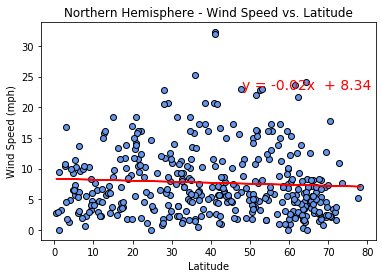

In [33]:
# Using the linear_regression function defined above, plot the linear regression between NH Wind Speed and Latitude
linear_regression(northern_hemp['Lat'], northern_hemp['Wind Speed'], 'Latitude', 'Wind Speed (mph)', 
                  'Northern Hemisphere - Wind Speed vs. Latitude', 48, 23)

### Southern Hemisphere - Latitude vs. Wind Speed (mph) 

The r-square value is: 0.13717.


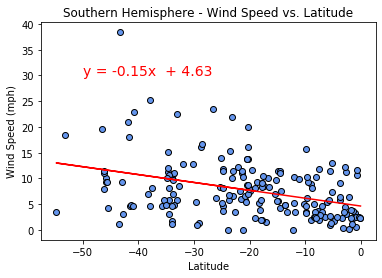

In [34]:
# Using the linear_regression function defined above, plot the linear regression between SH Wind Speed and Latitude
linear_regression(southern_hemp['Lat'], southern_hemp['Wind Speed'], 'Latitude', 'Wind Speed (mph)', 
                  'Southern Hemisphere - Wind Speed vs. Latitude', -50, 30)

### Observations:

* Based on the r-square values:
    * The wind speed of cities in the northern hempishere appear to have a very weak negative correlation with latitude.
    * The wind speed of cities in the southern hempishere appear to have a very weak negative correlation with latitude.
* Overall Conclusion: cities closer to the equator are not more or less windy.